# Ensemble model results and plots

- Dataframes have been formatted before plotting

In [1]:
import cometspy as c
import cobra.io
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as mpatches

In [2]:
#parameters for each simulation
parameters = pd.read_csv('parameters2.csv')

In [3]:
#closest and furthest sims
closest = pd.read_csv('closest.csv')
furthest = pd.read_csv('furthest.csv')

### Biomass

In [4]:
#simulation resuts
total_biomass = pd.read_csv('total_biomass2.csv')

#experimental results
#Nieselt et al.,
exp_biomass_data = [[20, 6.5e-4], [25, 1.8e-3], [30, 3.3e-3], [35, 5e-3], [40, 5e-3], [45, 5e-3], [50, 6e-3], [55, 6e-3], [60, 6e-3]]
exp_biomass = pd.DataFrame(exp_biomass_data, columns=['time (h)', 'Biomass'])

In [5]:
#stats
#medoid
biomass_medoid = pd.read_csv('biomass_medoid.csv')
biomass_medoid.rename(columns={'Biomass': 'Medoid'}, inplace = True)

#95% CI
biomass_CI = pd.read_csv('biomass_CI.csv')

lower_CI = total_biomass.loc[(total_biomass['Simulation'] == '<cometspy.comets.comets object at 0x7f8fb48324c0>')]
upper_CI = total_biomass.loc[(total_biomass['Simulation'] == '<cometspy.comets.comets object at 0x7f9052957dc0>')]

## Results

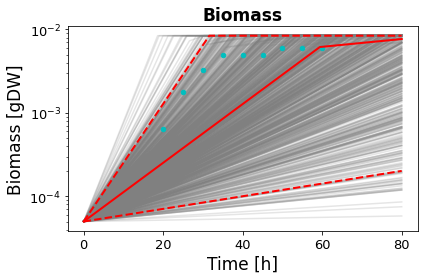

In [6]:
#plot
fig, ax = plt.subplots()
ax.set_yscale('log')

biomass_plot = total_biomass.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'gray', alpha = 0.2, legend = None, zorder = 0)
exp_biomass.plot.scatter(x = 'time (h)', ax = ax, y = 'Biomass', color = 'c', zorder = 5, legend = None)
biomass_medoid.plot(x = 'time (h)', y = 'Medoid', ax = ax, color = 'r', legend = None, zorder = 10, linewidth = 2)
lower_CI.plot(x = 'time (h)', y = 'Biomass', ax = ax, color = 'r', linestyle = 'dashed', zorder = 10, legend = None, linewidth = 2)
upper_CI.plot(x = 'time (h)', y = 'Biomass', ax = ax, color = 'r', linestyle = 'dashed', zorder = 10, legend = None, linewidth = 2)


ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Biomass [gDW]', fontsize=17)
ax.set_title('Biomass', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#save plot
#plt.savefig('total_biomass_plt.png')

In [7]:
#Experimental growth rate (in exponential phase)
exp_gr = (3.3e-3 - 6.5e-4)/10

#Medoid growth rate (in exponential phase)
med_gr = 0.006194/60

print('experimental: ', exp_gr)
print('medoid: ', med_gr)

experimental:  0.000265
medoid:  0.00010323333333333333


Experimental data - exponential phase between ~20 and 30 hours
-> From 6.5e-4 to 3.3e-3 g(CDW)

Growth rate = 2.65e-4g(CDW)/hr

Mediod between - exponential phase betwee 0 and 60 hours 
-> from 0 to 0.006194  g(CDW)

Growth rate = 1.32e-4g(CDW)/hr

## Closest and furthest sims

In [8]:
#closest and furthest simulations
closest_sims = pd.merge(closest, total_biomass, on ='Simulation')
furthest_sims = pd.merge(furthest, total_biomass, on ='Simulation')

closest1 = closest.nsmallest(1, 'total_dist')
closest1 = pd.merge(closest1, total_biomass, on ='Simulation')

furthest1 = furthest.nlargest(1, 'total_dist')
furthest1 = pd.merge(furthest1, total_biomass, on ='Simulation')

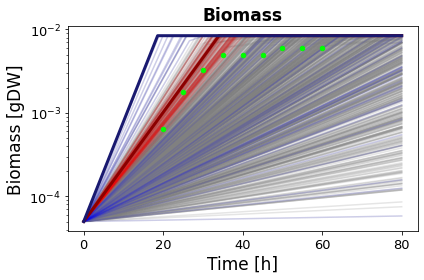

In [10]:
#with closest and furthest
fig, ax = plt.subplots()
ax.set_yscale('log')

biomass_plot = total_biomass.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'gray', alpha = 0.2, legend = None, zorder = 0)
exp_biomass.plot.scatter(x = 'time (h)', ax = ax, y = 'Biomass', color = 'lime', zorder = 5, legend = None)
closest_sims.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'r', legend = None, alpha = 0.1)
furthest_sims.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'b', legend = None, alpha = 0.1)
closest1.plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'darkred', legend = None, alpha = 1, linewidth = 3)
furthest1.plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'midnightblue', legend = None, alpha = 1, linewidth =3)

ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Biomass [gDW]', fontsize=17)
ax.set_title('Biomass', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

plt.savefig('total_biomass_sims_plt.png')

## Media

In [11]:
def media_plots(met_name, df, exp_df, lower_CI, upper_CI, c, title, save_name):
    ## with median and CI
    fig, ax = plt.subplots()

    met_plot = df.drop(columns=['cycle']).groupby(['Simulation']).plot(x='time (h)', y='conc_mmol', ax = ax, color = 'gray', alpha = 0.2, legend = None)
    exp_df.plot.scatter(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'c', zorder = 10)
    media_medoids.plot(x = 'time (h)', y = met_name, ax = ax, color = c, legend = None, linewidth = 2)
    upper_CI.plot(x = 'time (h)', y = 'conc_mmol', ax = ax, color = c, linestyle = 'dashed', legend = None, linewidth = 2)
    lower_CI.plot(x = 'time (h)', y = 'conc_mmol', ax = ax, color = c, linestyle = 'dashed', legend = None, linewidth = 2)

    ax.set_xlabel('Time [h]', fontsize=17)
    ax.set_ylabel('Concentration [mmol]', fontsize=17)
    ax.set_title(title, fontsize=17, fontweight = 'bold')
    ax.tick_params(labelsize=13)
    plt.tight_layout()

    #save plot
    #plt.savefig(save_name)

In [21]:
def closest_furthest_plots(df, exp_df, title, save_name):

    #closest and furthest simulations
    closest_sims = pd.merge(closest, df, on ='Simulation')
    furthest_sims = pd.merge(furthest, df, on ='Simulation')
    closest1 = closest.nsmallest(1, 'total_dist')
    closest1 = pd.merge(closest1, df, on ='Simulation')
    furthest1 = furthest.nlargest(1, 'total_dist')
    furthest1 = pd.merge(furthest1, df, on ='Simulation')
    
    fig, ax = plt.subplots()

    met_plot = df.drop(columns=['cycle']).groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'gray', alpha = 0.2, legend = None, zorder = 0)
    exp_df.plot.scatter(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'lime', zorder = 5)
    closest_sims.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'r', legend = None, alpha = 0.1)
    furthest_sims.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'b', legend = None, alpha = 0.1)
    closest1.plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'darkred', legend = None, alpha = 1, linewidth = 3)
    furthest1.plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'midnightblue', legend = None, alpha = 1, linewidth = 3)


    ax.set_xlabel('Time [h]', fontsize=17)
    ax.set_ylabel('Concentration [mmol]', fontsize=17)
    ax.set_title(title, fontsize=17, fontweight = 'bold')
    ax.tick_params(labelsize=13)
    plt.tight_layout()


    plt.savefig(save_name)

In [13]:
media = pd.read_csv('media2.csv')

#seperate out all the key metabolites
o2 = media.loc[(media['metabolite'] == 'o2_e')]
co2 = media.loc[(media['metabolite'] == 'co2_e')]
glc = media.loc[(media['metabolite'] == 'glc__D_e')]
glu = media.loc[(media['metabolite'] == 'glu__L_e')]
pi = media.loc[(media['metabolite'] == 'pi_e')]


#experimental results
#Nieselt et al., results
exp_glc_data = [[0, 0.39956], [20, 0.3497], [25, 0.3197], [30, 0.2997], [35, 0.2997], [40, 0.3197], [45, 0.3197], [50, 0.2698], [55, 0.2498], [60, 0.2997], [68, 0.2997]]
exp_glc = pd.DataFrame(exp_glc_data, columns=['time (h)', 'conc_mmol'])

#Nieselt et al., results
exp_glu_data = [[0, 0.5876], [20, 0.5876], [25, 0.497], [30, 0.4258], [35, 0.3725], [40, 0.3725], [45, 0.3406], [50, 0.298], [55, 0.234], [60, 0.2129], [68, 0.191]]
exp_glu = pd.DataFrame(exp_glu_data, columns=['time (h)', 'conc_mmol'])

#Nieselt et al., results
exp_pi_data = [[0, 0.0084], [20, 0.0076], [25, 0.00569], [30, 0.00028], [35, 0.00014]]
exp_pi = pd.DataFrame(exp_pi_data, columns=['time (h)', 'conc_mmol'])

#Nieselt et al., results - want to add on the ininital as the experiment only measured what was produced
exp_co2_data = [[20, 0.0309], [25, 0.0359], [30, 0.0409], [35, 0.0459], [40, 0.0429], [45, 0.0424], [50, 0.0394], [55, 0.0384], [60, 0.0374], [68, 0.0374]]
exp_co2 = pd.DataFrame(exp_co2_data, columns=['time (h)', 'conc_mmol'])

In [14]:
#stats
#medoids
media_medoids = pd.read_csv('media_medoids.csv')

#95% CI
o2_CI = pd.read_csv('o2_CI.csv')
o2_lower_CI = o2.loc[(o2['Simulation'] == '<cometspy.comets.comets object at 0x7fbdd86ae640>')]
o2_upper_CI = o2.loc[(o2['Simulation'] == '<cometspy.comets.comets object at 0x7fe8d9e698b0>')]

glc_CI = pd.read_csv('glc_CI.csv')
glc_lower_CI = glc.loc[(glc['Simulation'] == '<cometspy.comets.comets object at 0x7fbe88c9e0d0>')]
glc_upper_CI = glc.loc[(glc['Simulation'] == '<cometspy.comets.comets object at 0x7f8f8404b640>')]

glu_CI = pd.read_csv('glu_CI.csv')
glu_lower_CI = glu.loc[(glu['Simulation'] == '<cometspy.comets.comets object at 0x7fe88a42eeb0>')]
glu_upper_CI = glu.loc[(glu['Simulation'] == '<cometspy.comets.comets object at 0x7fbef8ebaf10>')]

pi_CI = pd.read_csv('pi_CI.csv')
pi_lower_CI = pi.loc[(pi['Simulation'] == '<cometspy.comets.comets object at 0x7fbef93cd640>')]
pi_upper_CI = pi.loc[(pi['Simulation'] == '<cometspy.comets.comets object at 0x7f8f54853cd0>')]
                       
co2_CI = pd.read_csv('co2_CI.csv')
co2_lower_CI = co2.loc[(co2['Simulation'] == '<cometspy.comets.comets object at 0x7fe9e84f50d0>')]
co2_upper_CI = co2.loc[(co2['Simulation'] == '<cometspy.comets.comets object at 0x7fbe187accd0>')]


### Oxygen

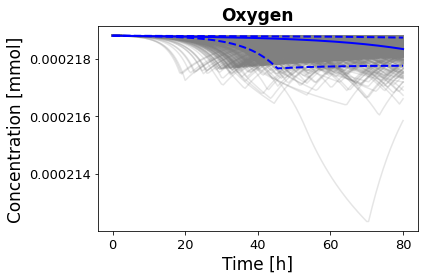

In [15]:
## with median and CI
fig, ax = plt.subplots()

o2_plot = o2.drop(columns=['cycle']).groupby(['Simulation']).plot(x='time (h)', y='conc_mmol', ax = ax, color = 'gray', alpha = 0.2, legend = None)
media_medoids.plot(x = 'time (h)', y = 'o2', ax = ax, color = 'blue', legend = None, linewidth = 2)
o2_upper_CI.plot(x = 'time (h)', y = 'conc_mmol', ax = ax, color = 'blue', linestyle = 'dashed', legend = None, linewidth = 2)
o2_lower_CI.plot(x = 'time (h)', y = 'conc_mmol', ax = ax, color = 'blue', linestyle = 'dashed', legend = None, linewidth = 2)

ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Oxygen', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#save plot
#plt.savefig('oxygen_plt.png')

In [16]:
#closest and furthest
closest_sims = pd.merge(closest, o2, on ='Simulation')
furthest_sims = pd.merge(furthest, o2, on ='Simulation')

closest1 = closest.nsmallest(1, 'total_dist')
closest1 = pd.merge(closest1, o2, on ='Simulation')

furthest1 = furthest.nlargest(1, 'total_dist')
furthest1 = pd.merge(furthest1, o2, on ='Simulation')

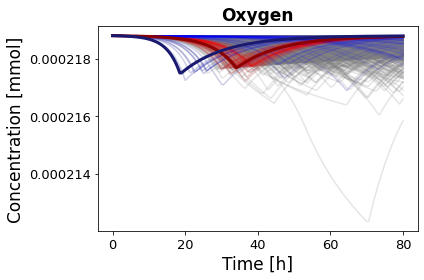

In [17]:
#plotting
fig, ax = plt.subplots()

o2_plot =o2.drop(columns=['cycle']).groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'gray', alpha = 0.2, legend = None, zorder = 0)
closest_sims.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'r', legend = None, alpha = 0.1)
furthest_sims.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'b', legend = None, alpha = 0.1)
closest1.plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'darkred', legend = None, alpha = 1, linewidth = 3)
furthest1.plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'midnightblue', legend = None, alpha = 1, linewidth = 3)


ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Oxygen', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

plt.savefig('oxygen_sims_plt.png')

### Glucose

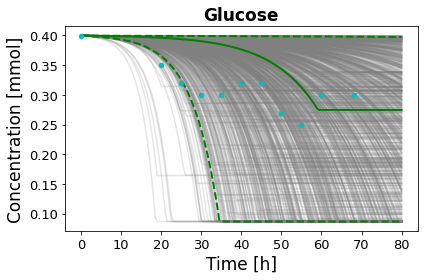

In [18]:
media_plots('glc', glc, exp_glc, glc_lower_CI, glc_upper_CI, 'green', 'Glucose', 'Glucose_plot.png')

In [20]:
#Experimental growth rate (in exponential phase)
exp_r = (0.39956 - 0.2997)/68

#Medoid growth rate (in exponential phase)
med_r = (0.39956 - 0.274496)/60

print('experimental: ', exp_r)
print('medoid: ', med_r)

experimental:  0.001468529411764706
medoid:  0.0020844


Experimental depletion -> from 0.39956 to 0.2997
from 0 to 68 hours
rate = 1.47e-3 mmol/hour

Medoid depletion -> from 0.39956 to 0.274496
from 0 to 60
rate = 2.08e-3 mmol/hour


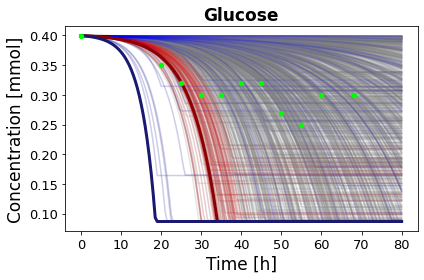

In [22]:
closest_furthest_plots(glc, exp_glc, 'Glucose', 'glucose_sims_plt.png')

### Glutamate

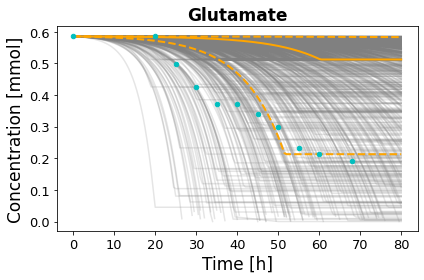

In [23]:
media_plots('glu', glu, exp_glu, glu_lower_CI, glu_upper_CI, 'orange', 'Glutamate', 'Glutamate_plot.png')

In [24]:
#Experimental growth rate (in exponential phase)
exp_r = (0.5876 - 0.191)/68

#Medoid growth rate (in exponential phase)
med_r = (0.5876 - 0.51404)/60

print('experimental: ', exp_r)
print('medoid: ', med_r)

experimental:  0.005832352941176471
medoid:  0.0012259999999999992


Experimental depletion -> from 0.5876 to 0.191
from 0 to 68 hours
rate = 5.83e-3 mmol/hour

Medoid depletion -> from 0.5876 to 0.51404
from 0 to 60
rate = 1.2e-3 mmol/hour

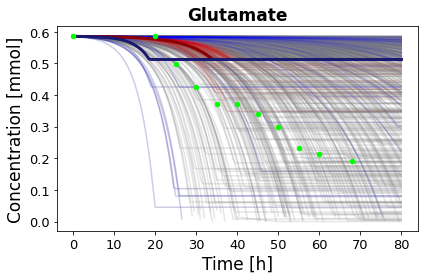

In [25]:
closest_furthest_plots(glu, exp_glu, 'Glutamate', 'glutamate_sims_plt.png')

### Phosphate

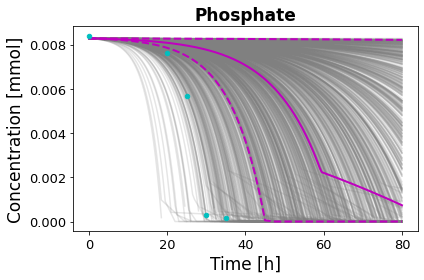

In [26]:
media_plots('pi', pi, exp_pi, pi_lower_CI, pi_upper_CI, 'm', 'Phosphate', 'phosphate_plot.png')

Experimental depletion -> from 0.0084 to 0.00014
from 0 to 68 hours
rate = 2.36e-4 mmol/hour

Medoid depletion -> from 0.0084 to 0.002199
from 0 to 60
rate = 1.03e-4 mmol/hour

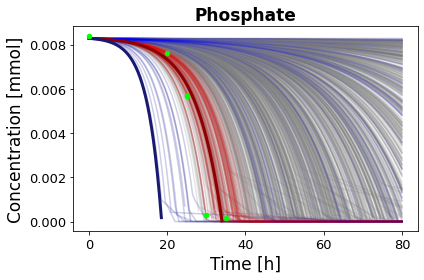

In [27]:
closest_furthest_plots(pi, exp_pi, 'Phosphate', 'phosphate_sims_plt.png')

### Carbon dioxide

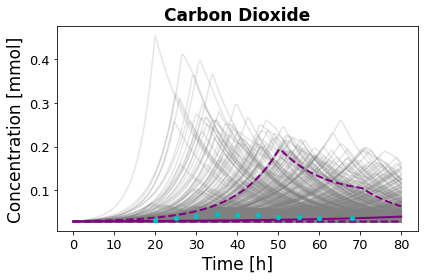

In [28]:
media_plots('co2', co2, exp_co2, co2_lower_CI, co2_upper_CI, 'purple', 'Carbon Dioxide', 'carbon_dioxide_plot.png')

In [29]:
#Experimental growth rate (in exponential phase)
exp_r = (0.0409 - 0.0309)/10

#Medoid growth rate (in exponential phase)
med_r = (0.033449 - 0.0309)/60

print('experimental: ', exp_r)
print('medoid: ', med_r)

experimental:  0.0009999999999999998
medoid:  4.248333333333332e-05


Experimental production -> from 0.0309 to 0.0409
from 20 to 30 hours
rate = 1e-3 mmol/hour

Medoid production -> 0.0309 to 0.033449
from 0 to 60
rate = 4.2e-5 mmol/hour

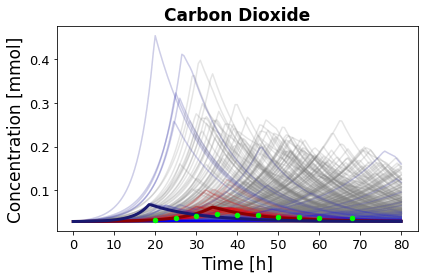

In [30]:
closest_furthest_plots(co2, exp_co2, 'Carbon Dioxide', 'co2_sims_plt.png')

# Sensitivity Analysis

In [29]:
#o2 Vmax values
sa_params = pd.read_csv('sa_parameters.csv')

### Total biomass

In [33]:
sa_tb = pd.read_csv('sa_total_biomass.csv')

In [34]:
#splitting data into ranges
total_biomass_0_20 = sa_tb.loc[(sa_tb['o2_Vmax'] >= 0) & (sa_tb['o2_Vmax'] < 0.00002)]
total_biomass_20_40 = sa_tb.loc[(sa_tb['o2_Vmax'] >= 0.00002) & (sa_tb['o2_Vmax'] < 0.00004)]
total_biomass_40_60 = sa_tb.loc[(sa_tb['o2_Vmax'] >= 0.00004) & (sa_tb['o2_Vmax'] < 0.00006)]
total_biomass_60_80 = sa_tb.loc[(sa_tb['o2_Vmax'] >= 0.00006) & (sa_tb['o2_Vmax'] < 0.00008)]
total_biomass_80_90 = sa_tb.loc[(sa_tb['o2_Vmax'] >= 0.00008) & (sa_tb['o2_Vmax'] < 0.00009)]
total_biomass_90 = sa_tb.loc[(sa_tb['o2_Vmax'] >= 0.00009)]

<ipython-input-37-b622ad6bdb38>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


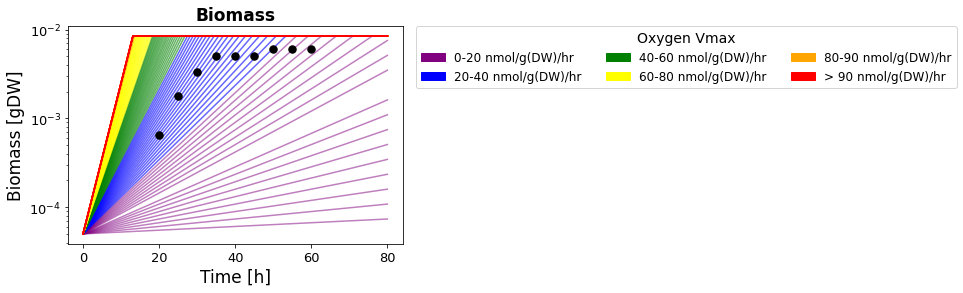

In [37]:
fig, ax = plt.subplots()
ax.set_yscale('log')

biomass_plot = total_biomass_0_20.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'purple', alpha = 0.5, legend = None, zorder = 0)
total_biomass_20_40.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'blue', alpha = 0.6, legend = None, zorder = 0)
total_biomass_40_60.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'green', alpha = 0.6, legend = None, zorder = 0)
total_biomass_60_80.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'yellow', alpha = 0.6, legend = None, zorder = 0)
total_biomass_80_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'orange', alpha = 0.6, legend = None, zorder = 0)
total_biomass_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'Biomass', color = 'red', alpha = 0.6, legend = None, zorder = 0)
exp_biomass.plot.scatter(x = 'time (h)', ax = ax, y = 'Biomass', color = 'black', zorder = 5, legend = None, s = 55)


range1 = mpatches.Patch(color='purple', label='0-20 nmol/g(DW)/hr')
range2 = mpatches.Patch(color='blue', label='20-40 nmol/g(DW)/hr')
range3 = mpatches.Patch(color='green', label='40-60 nmol/g(DW)/hr')
range4 = mpatches.Patch(color= 'yellow', label='60-80 nmol/g(DW)/hr')
range5 = mpatches.Patch(color='orange', label='80-90 nmol/g(DW)/hr')
range6 = mpatches.Patch(color='red', label='> 90 nmol/g(DW)/hr')
ax.legend(handles=[range1, range2, range3, range4, range5, range6], bbox_to_anchor=(1.04, 1), borderaxespad=0, fontsize = 12, ncol = 3, 
         title='Oxygen Vmax', title_fontsize = 14)


ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Biomass [gDW]', fontsize=17)
ax.set_title('Biomass', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#save plot
#plt.savefig('total_biomass_vmax.png')

#### rate of change
72 nmol/g(DW)/hr
-> 5.6e-3 g(DW)/hr 

18 nmol/g(DW)/hr
-> 1.29e-3 g(DW)/hr

4.3 fold less

## Media

In [38]:
media = pd.read_csv('sa_media.csv')

In [39]:
media_0_20 = media.loc[(media['o2_Vmax'] >= 0) & (media['o2_Vmax'] < 0.00002)]
media_20_40 = media.loc[(media['o2_Vmax'] >= 0.00002) & (media['o2_Vmax'] < 0.00004)]
media_40_60 = media.loc[(media['o2_Vmax'] >= 0.00004) & (media['o2_Vmax'] < 0.00006)]
media_60_80 = media.loc[(media['o2_Vmax'] >= 0.00006) & (media['o2_Vmax'] < 0.00008)]
media_80_90 = media.loc[(media['o2_Vmax'] >= 0.00008) & (media['o2_Vmax'] < 0.00009)]
media_90 = media.loc[(media['o2_Vmax'] >= 0.00009)]

In [41]:
#o2 
o2_0_20 = media_0_20.loc[(media_0_20['metabolite'] == 'o2_e')]
o2_20_40 = media_20_40.loc[(media_20_40['metabolite'] == 'o2_e')]
o2_40_60 = media_40_60.loc[(media_40_60['metabolite'] == 'o2_e')]
o2_60_80 = media_60_80.loc[(media_60_80['metabolite'] == 'o2_e')]
o2_80_90 = media_80_90.loc[(media_80_90['metabolite'] == 'o2_e')]
o2_90 = media_90.loc[(media_90['metabolite'] == 'o2_e')]

#co2 
co2_0_20 = media_0_20.loc[(media_0_20['metabolite'] == 'co2_e')]
co2_20_40 = media_20_40.loc[(media_20_40['metabolite'] == 'co2_e')]
co2_40_60 = media_40_60.loc[(media_40_60['metabolite'] == 'co2_e')]
co2_60_80 = media_60_80.loc[(media_60_80['metabolite'] == 'co2_e')]
co2_80_90 = media_80_90.loc[(media_80_90['metabolite'] == 'co2_e')]
co2_90 = media_90.loc[(media_90['metabolite'] == 'co2_e')]

#glc 
glc_0_20 = media_0_20.loc[(media_0_20['metabolite'] == 'glc__D_e')]
glc_20_40 = media_20_40.loc[(media_20_40['metabolite'] == 'glc__D_e')]
glc_40_60 = media_40_60.loc[(media_40_60['metabolite'] == 'glc__D_e')]
glc_60_80 = media_60_80.loc[(media_60_80['metabolite'] == 'glc__D_e')]
glc_80_90 = media_80_90.loc[(media_80_90['metabolite'] == 'glc__D_e')]
glc_90 = media_90.loc[(media_90['metabolite'] == 'glc__D_e')]

#glu
glu_0_20 = media_0_20.loc[(media_0_20['metabolite'] == 'glu__L_e')]
glu_20_40 = media_20_40.loc[(media_20_40['metabolite'] == 'glu__L_e')]
glu_40_60 = media_40_60.loc[(media_40_60['metabolite'] == 'glu__L_e')]
glu_60_80 = media_60_80.loc[(media_60_80['metabolite'] == 'glu__L_e')]
glu_80_90 = media_80_90.loc[(media_80_90['metabolite'] == 'glu__L_e')]
glu_90 = media_90.loc[(media_90['metabolite'] == 'glu__L_e')]


#pi
pi_0_20 = media_0_20.loc[(media_0_20['metabolite'] == 'pi_e')]
pi_20_40 = media_20_40.loc[(media_20_40['metabolite'] == 'pi_e')]
pi_40_60 = media_40_60.loc[(media_40_60['metabolite'] == 'pi_e')]
pi_60_80 = media_60_80.loc[(media_60_80['metabolite'] == 'pi_e')]
pi_80_90 = media_80_90.loc[(media_80_90['metabolite'] == 'pi_e')]
pi_90 = media_90.loc[(media_90['metabolite'] == 'pi_e')]

## Oxygen

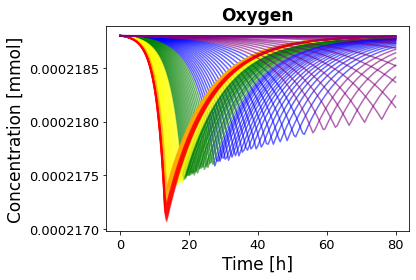

In [42]:
fig, ax = plt.subplots()

o2_plot = o2_0_20.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'purple', alpha = 0.6, legend = None, zorder = 10)
o2_20_40.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'blue', alpha = 0.6, legend = None, zorder = 0)
o2_40_60.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'green', alpha = 0.6, legend = None, zorder = 0)
o2_60_80.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'yellow', alpha = 0.6, legend = None, zorder = 0)
o2_80_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'orange', alpha = 0.6, legend = None, zorder = 0)
o2_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'red', alpha = 0.6, legend = None, zorder = 0)

ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Oxygen', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#plt.savefig('oxygen_vmax.png')

72 nmol/g(DW)/hr
-> 0.12 nmol/hr

18nmol/g(DW)/hr
-> 0.012 nmol/hr

1 magnitude less

## Carbon dioxide

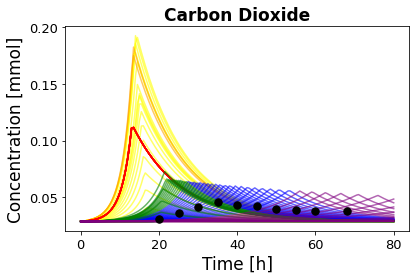

In [43]:
fig, ax = plt.subplots()

co2_plot = co2_0_20.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'purple', alpha = 0.6, legend = None, zorder = 10)
co2_20_40.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'blue', alpha = 0.6, legend = None, zorder = 5)
co2_40_60.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'green', alpha = 0.6, legend = None, zorder = 5)
co2_60_80.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'yellow', alpha = 0.6, legend = None, zorder = 0)
co2_80_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'orange', alpha = 0.6, legend = None, zorder = 0)
co2_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'red', alpha = 0.6, legend = None, zorder = 0)
exp_co2.plot.scatter(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'black', zorder = 15, legend = None, s = 55)



ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Carbon Dioxide', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#plt.savefig('carbon dioxide_vmax.png')

72 nmol/g(DW)/hr
-> 7.2e-3 nmol/hr

18 nmol/g(DW)/hr
-> 2.1e-4 mmol/hr

30 fold less

## Glucose

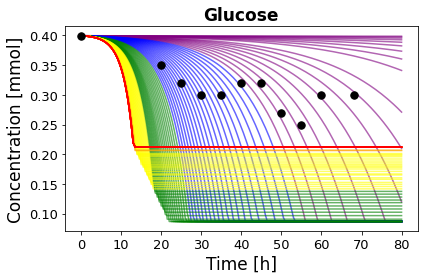

In [46]:
fig, ax = plt.subplots()

glc_plot = glc_0_20.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'purple', alpha = 0.6, legend = None, zorder = 0)
glc_20_40.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'blue', alpha = 0.6, legend = None, zorder = 0)
glc_40_60.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'green', alpha = 0.6, legend = None, zorder = 0)
glc_60_80.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'yellow', alpha = 0.6, legend = None, zorder = 0)
glc_80_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'orange', alpha = 0.6, legend = None, zorder = 0)
glc_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'red', alpha = 0.6, legend = None, zorder = 0)
exp_glc.plot.scatter(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'black', zorder = 5, legend = None, s = 55)


ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Glucose', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#plt.savefig('glucose_vmax.png')

72 nmol/g(DW)/hr
-> 1.4e-2 mmol/hr

18 nmol/g(DW)/hr
-> 4.8e-5 mmol/hr

300 fold less

## Glutamate

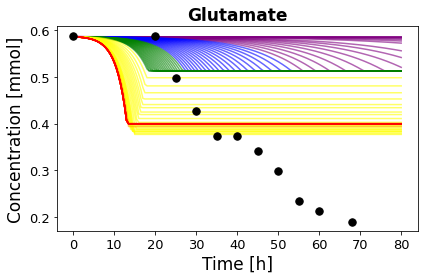

In [47]:
fig, ax = plt.subplots()

glu_plot = glu_0_20.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'purple', alpha = 0.6, legend = None, zorder = 0)
glu_20_40.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'blue', alpha = 0.6, legend = None, zorder = 0)
glu_40_60.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'green', alpha = 0.6, legend = None, zorder = 0)
glu_60_80.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'yellow', alpha = 0.6, legend = None, zorder = 0)
glu_80_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'orange', alpha = 0.6, legend = None, zorder = 0)
glu_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'red', alpha = 0.6, legend = None, zorder = 0)
exp_glu.plot.scatter(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'black', zorder = 5, legend = None, s = 55)

ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Glutamate', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#plt.savefig('glutamate_vmax.png')

72 nmol
-> 1.4e-2 mmol/her

18 nmol
-> 3.6e-5 mmol/hr

400 fold less

## Phosphate

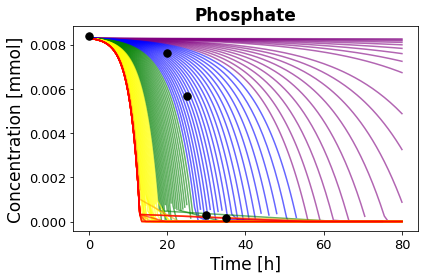

In [49]:
fig, ax = plt.subplots()

pi_plot = pi_0_20.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'purple', alpha = 0.6, legend = None, zorder = 0)
pi_20_40.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'blue', alpha = 0.6, legend = None, zorder = 0)
pi_40_60.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'green', alpha = 0.6, legend = None, zorder = 0)
pi_60_80.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'yellow', alpha = 0.6, legend = None, zorder = 0)
pi_80_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'orange', alpha = 0.6, legend = None, zorder = 0)
pi_90.groupby(['Simulation']).plot(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'red', alpha = 0.6, legend = None, zorder = 0)
exp_pi.plot.scatter(x = 'time (h)', ax = ax, y = 'conc_mmol', color = 'black', zorder = 5, legend = None, s = 55)


ax.set_xlabel('Time [h]', fontsize=17)
ax.set_ylabel('Concentration [mmol]', fontsize=17)
ax.set_title('Phosphate', fontsize=17, fontweight = 'bold')
ax.tick_params(labelsize=13)
plt.tight_layout()

#plt.savefig('phosphate_vmax.png')

72 nmol/g(DW)/hr
-> 4.3e-4 nmol/hr

18 nmol/g(DW)/hr
-> 2.12e-6 mmol/hr

200 fold less

## O2 into media

In [50]:
media_flux = pd.read_csv('sa_flux_to_media.csv')

In [52]:
media_flux

,Simulation,cycle_x,x,y,EX_o2_e,o2_Vmax_x,o2_Vmax_y,time (h),cycle_y,Biomass,o2_Vmax
0,<cometspy.comets.comets object at 0x7ff2c9f21970>,5,1,1,-9.954504e-07,0.000001,0.000001,0.5,5,0.000050,0.000001
1,<cometspy.comets.comets object at 0x7ff2c9f21970>,10,1,1,-9.954504e-07,0.000001,0.000001,1.0,10,0.000050,0.000001
2,<cometspy.comets.comets object at 0x7ff2c9f21970>,15,1,1,-9.954504e-07,0.000001,0.000001,1.5,15,0.000050,0.000001
3,<cometspy.comets.comets object at 0x7ff2c9f21970>,20,1,1,-9.954504e-07,0.000001,0.000001,2.0,20,0.000050,0.000001
4,<cometspy.comets.comets object at 0x7ff2c9f21970>,25,1,1,-9.954504e-07,0.000001,0.000001,2.5,25,0.000051,0.000001
...,...,...,...,...,...,...,...,...,...,...,...
15675,<cometspy.comets.comets object at 0x7ff25afbe7f0>,780,1,1,0.000000e+00,0.000091,0.000091,78.0,780,0.008415,0.000091
15676,<cometspy.comets.comets object at 0x7ff25afbe7f0>,785,1,1,0.000000e+00,0.000091,0.000091,78.5,785,0.008415,0.000091
15677,<cometspy.comets.comets object at 0x7ff25afbe7f0>,790,1,1,0.000000e+00,0.000091,0.000091,79.0,790,0.008415,0.000091
15678,<cometspy.comets.comets object at 0x7ff25afbe7f0>,795,1,1,0.000000e+00,0.000091,0.000091,79.5,795,0.008415,0.000091


Negative flux indicated the oxygen is moving into the media

In [54]:
media_flux.loc[media_flux['EX_o2_e'].idxmin()]

Simulation    <cometspy.comets.comets object at 0x7ff279c464c0>
cycle_x                                                      20
x                                                             1
y                                                             1
EX_o2_e                                                -0.00006
o2_Vmax_x                                               0.00006
o2_Vmax_y                                               0.00006
time (h)                                                    2.0
cycle_y                                                      20
Biomass                                                0.000089
o2_Vmax                                                 0.00006
Name: 9443, dtype: object

## Pairwise Correlation Analysis 

In [56]:
closest = pd.read_csv('closest.csv')

In [57]:
#gets parameter values from the closest simulations
closest.rename(columns = {'total_dist' : 'TED'}, inplace = True)
closest.drop(columns = ['Simulation', 'biomass', 'pi', 'glc', 'glu'] , inplace = True)

In [59]:
euclidean_distances = pd.read_csv('euclidean_distances.csv')
TED = euclidean_distances
TED.drop(columns = ['Unnamed: 0', 'Simulation', 'biomass', 'pi', 'glc', 'glu'], inplace = True)

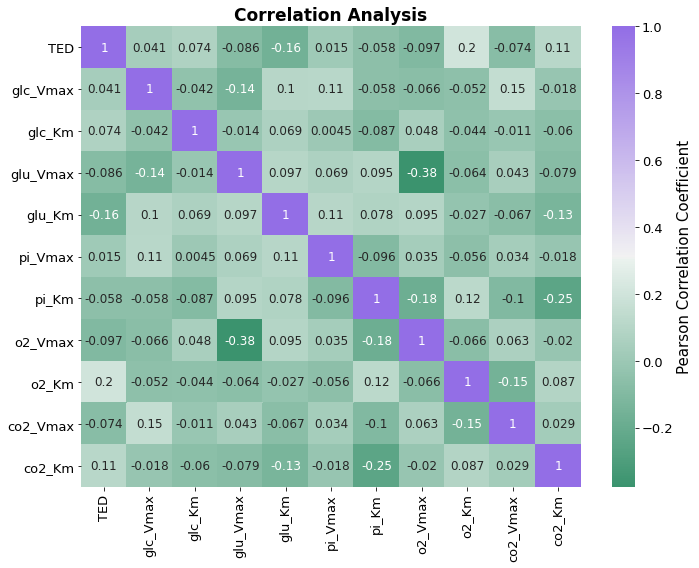

In [60]:
closest['TED'] = TED


closest_mean = []
closest_sd = []
for column in closest:
    mean = np.mean(closest[column])
    sd = np.std(closest[column])
    closest_mean.append(mean)
    closest_sd.append(mean)

for i in range(0, 11):
    tmp1 = list(closest.iloc[:, i])
    tmp = np.log(tmp1)
    ave = closest_mean[i]
    var = closest_sd[i]
    closest.iloc[:, i] = [(x-ave)/var for x in tmp]
    

corr = closest.corr(method ='pearson')
corr.round(3)

import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
corr_plot= sns.heatmap(corr, cmap=cmap, annot = True, cbar_kws={'label': 'Pearson Correlation Coefficient'}, annot_kws={"fontsize":12})

plt.tick_params(labelsize = 13)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.set_title('Correlation Analysis', fontsize=17, fontweight = 'bold')
plt.tight_layout()

#fig.savefig("corr_closest.png") 